In [3]:
import matplotlib.pyplot as plt
import numpy as np
from modules.log import log
from modules.Request_Data import Get_Data
from modules.Data_Classes.Student import Student

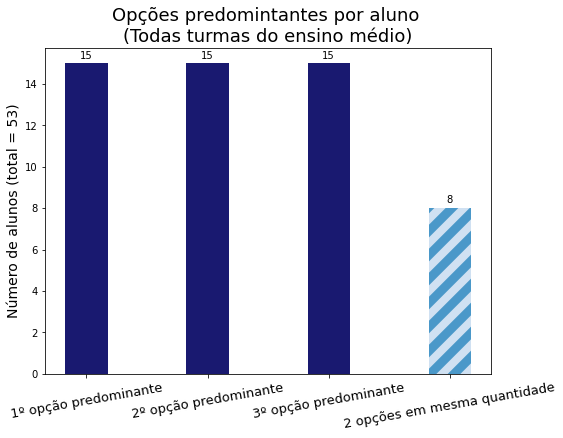

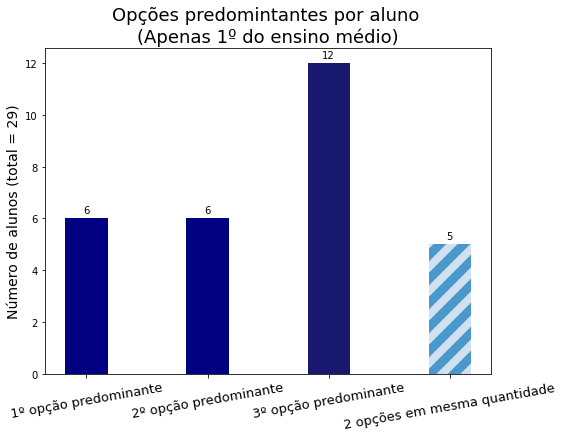

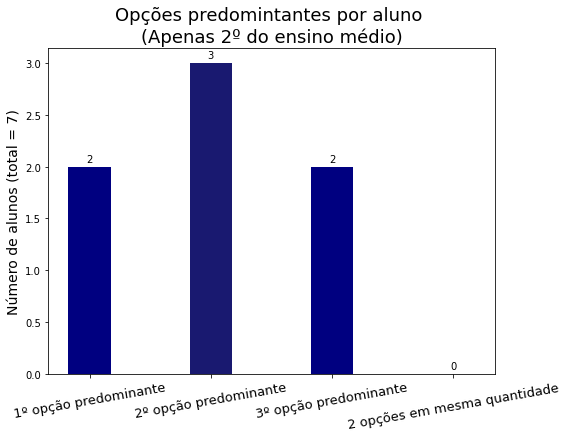

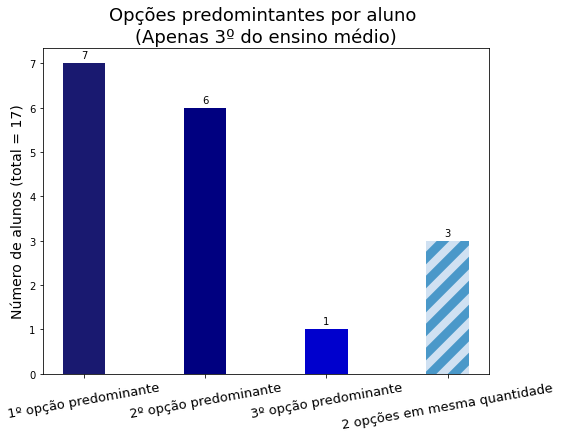

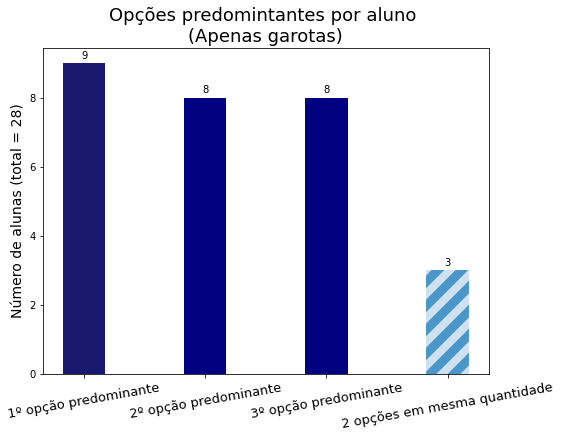

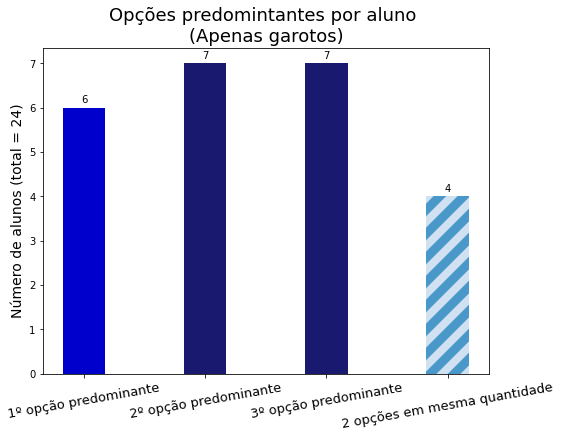

In [4]:
@log
def sort_array(num_array: list) -> list:
  # Sorting array with bubble logic

  array: list = num_array.copy()

  for i in range(len(num_array)):
    swapped: bool = False
    
    for j in range(len(num_array) - 1):

      if array[j] > array[j + 1]:
        # Swap elements if they are in wrong order
        array[j], array[j + 1] = array[j + 1], array[j]

        # Register the swap
        swapped = True
      
    # If there is no swaps then the array is already sorted, no need to continue 
    if not swapped:
        return array

  return array


@log
def define_color(num: int, sorted_array: list) -> str:
  if num == sorted_array[2]:
    return 'midnightblue'
  
  if num == sorted_array[1]:
    return 'navy'

  return 'mediumblue'

@log
def filter_data(data_array: list, answers_data_array: list, key_to_filter: str, filter_str: str) -> dict:
  students_data_array = []
  students_answers_data_array = []

  for index in range(len(data_array)):
    if data_array[index][key_to_filter] == filter_str:

      students_data_array.append(data_array[index])
      students_answers_data_array.append(answers_data_array[index])

  return {
    'students': students_data_array,
    'students_answers': students_answers_data_array
  }

@log
def create_bars_graphic(data_array: list, title: tuple, ylabel: tuple, labels: list, bars_width: float, data_padding: int):
  figure, axes = plt.subplots(figsize=(8, 6))
  x = np.arange(len(labels))

  sorted_numbers_array = sort_array(data_array[:3])

  for index, data in enumerate(data_array):

    if index != 3:
      rect = axes.bar(index, data, width=bars_width, color=define_color(data, sorted_numbers_array))
      axes.bar_label(rect, padding=data_padding)
      continue

    
    cmap = plt.get_cmap("Blues")
    plt.rcParams['hatch.color'] = cmap(0.2)
    plt.rcParams['hatch.linewidth'] = 8
    rect = axes.bar(index, data, width=bars_width, color=cmap(0.6), hatch='/')

    axes.bar_label(rect, padding=data_padding)

  axes.set_title(title[0], size=title[1])

  axes.set_ylabel(ylabel[0], size=ylabel[1])

  axes.set_xticks(x)
  axes.set_xticklabels(labels, rotation=10, fontsize=13, verticalalignment='top')

  return figure

@log
def predominant_options_between_students(students: list, students_answers: list) -> dict:
  option_1_mean = [0]
  option_2_mean = [0]
  option_3_mean = [0]
  draw_mean = [0]

  for index in range(len(students)):
    student = Student(students_answers[index], students[index])
    predominant_options = student.predominant_options.split(', ')

    if ('option 1' in predominant_options 
        and 'option 2' not in predominant_options
        and 'option 3' not in predominant_options):
      option_1_mean[0] += 1
      continue
    
    if ('option 2' in predominant_options 
        and 'option 1' not in predominant_options
        and 'option 3' not in predominant_options):
      option_2_mean[0] += 1
      continue
    
    if ('option 3' in predominant_options 
        and 'option 2' not in predominant_options
        and 'option 1' not in predominant_options):
      option_3_mean[0] += 1
      continue
    
    draw_mean[0] += 1
  
  return {
    'op_1_mean': option_1_mean,
    'op_2_mean': option_2_mean,
    'op_3_mean': option_3_mean,
    'draw_mean': draw_mean
  }

WIDTH = 0.35
PADDING = 3

# Retrieve data from API
students = Get_Data.students_data()
students_answers = Get_Data.answers_data()

################################### The whole school ######################################################

whole_high_school_data = predominant_options_between_students(students, students_answers)

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
whole_high_school_data_array = [whole_high_school_data['op_1_mean'], whole_high_school_data['op_2_mean'], whole_high_school_data['op_3_mean'], whole_high_school_data['draw_mean']]
title = ('Opções predomintantes por aluno \n(Todas turmas do ensino médio)', 18)
ylabel = (f'Número de alunos (total = {len(students)})', 14)


between_whole_high_school_graphic = create_bars_graphic(whole_high_school_data_array, title, ylabel, labels, WIDTH, PADDING)

################################### Only 1º grade ######################################################

only_first_grade_students_filtered = filter_data(students, students_answers, 'grade', '1º ano do ensino medio')

only_first_grade_students = only_first_grade_students_filtered['students']
only_first_grade_answers = only_first_grade_students_filtered['students_answers']

only_first_grade_data = predominant_options_between_students(only_first_grade_students, only_first_grade_answers)

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
only_first_grade_data_array = [only_first_grade_data['op_1_mean'], only_first_grade_data['op_2_mean'], only_first_grade_data['op_3_mean'], only_first_grade_data['draw_mean']]
title = ('Opções predomintantes por aluno \n(Apenas 1º do ensino médio)', 18)
ylabel = (f'Número de alunos (total = {len(only_first_grade_students)})', 14)

between_first_grade_graphic = create_bars_graphic(only_first_grade_data_array, title, ylabel, labels, WIDTH, PADDING)

################################### Only 2º grade ######################################################

only_second_grade_students_filtered = filter_data(students, students_answers, 'grade', '2º ano do ensino medio')

only_second_grade_students = only_second_grade_students_filtered['students']
only_second_grade_answers = only_second_grade_students_filtered['students_answers']

only_second_grade_data = predominant_options_between_students(only_second_grade_students, only_second_grade_answers)

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
only_second_grade_data_array = [only_second_grade_data['op_1_mean'], only_second_grade_data['op_2_mean'], only_second_grade_data['op_3_mean'], only_second_grade_data['draw_mean']]
title = ('Opções predomintantes por aluno \n(Apenas 2º do ensino médio)', 18)
ylabel = (f'Número de alunos (total = {len(only_second_grade_students)})', 14)

between_second_grade_graphic = create_bars_graphic(only_second_grade_data_array, title, ylabel, labels, WIDTH, PADDING)

################################### Only 3º grade ######################################################

only_third_grade_students_filtered = filter_data(students, students_answers, 'grade', '3º ano do ensino medio')

only_third_grade_students = only_third_grade_students_filtered['students']
only_third_grade_answers = only_third_grade_students_filtered['students_answers']

only_third_grade_data = predominant_options_between_students(only_third_grade_students, only_third_grade_answers)

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
only_third_grade_data_array = [only_third_grade_data['op_1_mean'], only_third_grade_data['op_2_mean'], only_third_grade_data['op_3_mean'], only_third_grade_data['draw_mean']]
title = ('Opções predomintantes por aluno \n(Apenas 3º do ensino médio)', 18)
ylabel = (f'Número de alunos (total = {len(only_third_grade_students)})', 14)

between_third_grade_graphic = create_bars_graphic(only_third_grade_data_array, title, ylabel, labels, WIDTH, PADDING)

################################### Only girls ######################################################

only_girls_students_filtered = filter_data(students, students_answers, 'genre', 'feminino')

only_girls_students = only_girls_students_filtered['students']
only_girls_answers = only_girls_students_filtered['students_answers']

only_girls_data = predominant_options_between_students(only_girls_students, only_girls_answers)

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
only_girls_data_array = [only_girls_data['op_1_mean'], only_girls_data['op_2_mean'], only_girls_data['op_3_mean'], only_girls_data['draw_mean']]
title = ('Opções predomintantes por aluno \n(Apenas garotas)', 18)
ylabel = (f'Número de alunas (total = {len(only_girls_students)})', 14)

between_girls_graphic = create_bars_graphic(only_girls_data_array, title, ylabel, labels, WIDTH, PADDING)

################################### Only boys ######################################################

only_boys_students_filtered = filter_data(students, students_answers, 'genre', 'masculino')

only_boys_students = only_boys_students_filtered['students']
only_boys_answers = only_boys_students_filtered['students_answers']

only_boys_data = predominant_options_between_students(only_boys_students, only_boys_answers)

labels = ['1º opção predominante', '2º opção predominante', '3º opção predominante', '2 opções em mesma quantidade']
only_boys_data_array = [only_boys_data['op_1_mean'], only_boys_data['op_2_mean'], only_boys_data['op_3_mean'], only_boys_data['draw_mean']]
title = ('Opções predomintantes por aluno \n(Apenas garotos)', 18)
ylabel = (f'Número de alunos (total = {len(only_boys_students)})', 14)

between_boys_graphic = create_bars_graphic(only_boys_data_array, title, ylabel, labels, WIDTH, PADDING)










